# Lab 3 - Filters and Z Transforms

*This week, the lab will work through plotting the impulse response and z transform of filters.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal

%matplotlib inline

### (a)
Find the transfer function H(z) for the filter corresponding to the following difference equation:

$$ y[n] = 0.9y[n-1] + 1.8x[n] $$

Briefly show your work using Latex syntax.

***Hint:*** Latex syntax should go between two pairs of dollar signs. Here's an example calculation.

$$ x^{2} - 4 = 0 $$

$$ (x-2)(x+2) = 0 $$

$$ x = 2, x = -2 $$

Also, \frac{}{} can be used to make fractions. Like this:

$$ \frac{3x - 4}{x + 6} $$

### Your Answer:

$$ y[n] - 0.9 y[n-1] = 1.8 x[n] $$
$$ Y(z) - 0.9 Y(z)z^{-1} = 1.8 X(z) $$
$$ Y(z) (1-0.9z^{-1}) = 1.8 X(z) $$
$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1.8}{1-0.9z^{-1}} = (1.8)(\frac{1}{1-0.9z^{-1}}) $$
$$ H(z) = \frac{1.8z}{z-0.9} $$

### (b)
Find the causal impulse response h[n] for the above system.

***Hint:*** You may refer to a z transform table.


### Your Answer:

$$ h[n] = (1.8)(0.9)^nu[n] $$

### (c)
Plot the first 20 samples of the impulse response h[n]. Some of the code is already written for you. What kind of filter is this?

***Hint:*** The signal.dlti() function takes as input two lists, the transfer function's numerator coefficients and denominator coefficients.

### Your Answer:


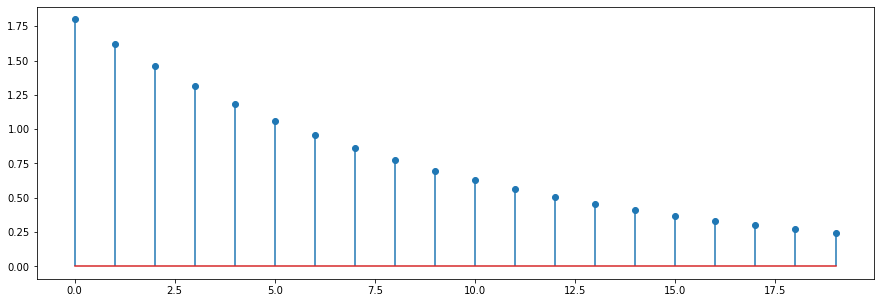

In [67]:
##### to do #####
# determine the transfer function coefficients
numH = [1.8, 0]
denH = [1, -0.9]
#################

# compute the impulse response
systemH = signal.dlti(numH, denH)
n, h = signal.dimpulse(systemH, n=20)

# plot the impulse response
plt.figure(figsize = (15,5))
plt.stem(n,np.squeeze(h), use_line_collection=True);

# THIS IS A LOW-PASS FILTER. THE HIGHER FREQUENCIES GET ATTENUATED.

### (d)
Plot any poles and zeros of this filter on the z plane. Is the system stable?

***Hint:*** You may consider using the following functions:
- signal.ZerosPolesGain()
- plt.scatter()

Also, remember that if x is a complex number, x.real and x.imag are its components.

### Your Answer:

Poles: [0.9]
Zeros: [0.]


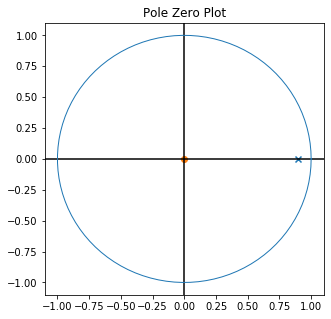

In [74]:
# make plot with axes
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# draw unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

##### to do #####
# plot the poles and zeros of system H
zpg_h = signal.ZerosPolesGain(systemH)
print("Poles: %s" % zpg_h.poles)
print("Zeros: %s" % zpg_h.zeros)
plt.title('Pole Zero Plot')
plt.scatter(zpg_h.poles.real,zpg_h.poles.imag,marker='x');
plt.scatter(zpg_h.zeros.real,zpg_h.zeros.imag,marker='o');
#################

# THIS SYSTEM IS STABLE

### (e)
Condsider feeding the output of this system directly into another system, G(z). Find a transfer function for G(z) such that any input signal after going through H(z) and then G(z) will come out unchanged. In other words, G(z) cancels all effects of H(z).

### Your Answer:

$$ H(z) = \frac{1.8z}{z-0.9} $$
$$ \frac{1.8}{1-0.9z^{-1}} $$
$$ \frac{1-0.9z^{-1}}{1.8} $$

$$ \frac{1}{1.8} - \frac{0.9z^{-1}}{1.8} $$
$$ \frac{1}{1.8} - 0.5z^{-1} $$




### (f)
Find the causal impulse response g[n] for G(z).

### Your Answer:

$$ g[n] = \frac{1}{1.8}\delta[n] - 0.5\delta[n-1] $$

### (g)
Plot the first 20 samples of the impulse response h[n]. What kind of filter is this?

***Hint:*** you may consider using the following functions:
- signal.dlti()
- signal.dimpulse()
- plt.stem()
- np.squeeze()

### Your Answer:

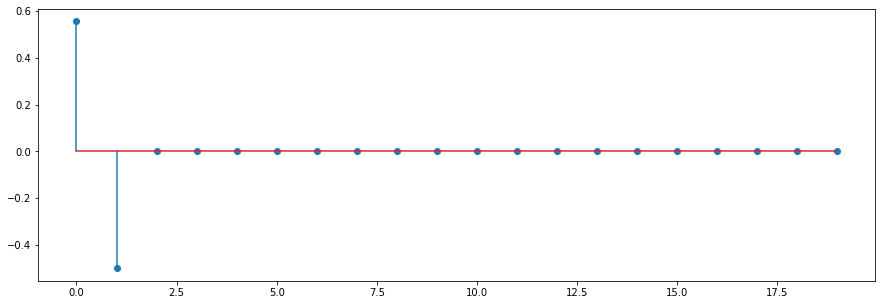

In [63]:
##### to do #####

# determine the transfer function coefficients
numG = [1, -0.9]
denG = [1.8, 0]
# compute the impulse response
systemG = signal.dlti(numG, denG)
nn, g = signal.dimpulse(systemG, n=20)
# plot the impulse response
plt.figure(figsize = (15,5))
plt.stem(nn,np.squeeze(g), use_line_collection=True);
#################


# THIS IS A LOW-PASS FILTER. THE HIGHER FREQUENCIES GET ATTENUATED.

### (h)
Plot any poles and zeros of this filter G(z) on the z plane. Is the system stable?

### Your Answer:

Poles: [0.9]
Zeros: [0.]


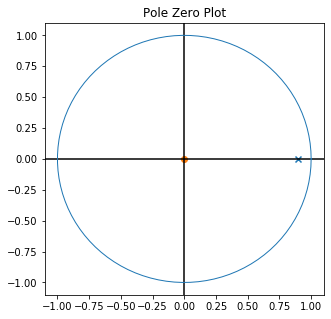

In [75]:
# make plot with axes
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# draw unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

##### to do #####
# plot the poles and zeros of system G
zpg_g = signal.ZerosPolesGain(systemH)
print("Poles: %s" % zpg_g.poles)
print("Zeros: %s" % zpg_g.zeros)
plt.title('Pole Zero Plot')
plt.scatter(zpg_g.poles.real,zpg_g.poles.imag,marker='x');
plt.scatter(zpg_g.zeros.real,zpg_g.zeros.imag,marker='o');
#################

# THIS SYSTEM IS STABLE